#Best Neighborhood in Pittsburgh Based on Registered Dog Licenses

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("DogLicenses.csv", low_memory = False)
df.head(10)

,_id,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,3878524,Dog Individual Female,DACHSHUND,BLACK/BROWN,LUNA,15214,2025,2024-12-02T08:20:05
1,3878525,Dog Individual Female,GREAT PYRENEES,WHITE,ELLIE,15214,2025,2024-12-02T08:20:05
2,3878526,Dog Senior Citizen or Disability Female,GOLDENDOODLE,CREAM,DANCER,15234,2025,2024-12-02T08:45:20
3,3878527,Dog Individual Male,GER SHEPHERD MIX,BLACK/BROWN,THOR,15239,2025,2024-12-02T10:38:09
4,3878528,Dog Senior Citizen or Disability Female,MOUNTAIN CUR,BRINDLE,ZOEY,15132,2025,2024-12-02T11:20:09
5,3878529,Dog Individual Female,BOXER,BRINDLE,MARLEY,15065,2025,2024-12-02T10:38:10
6,3878530,Dog Individual Male,DOBERMAN PINSCHER,RED,CHAOS,15065,2025,2024-12-02T10:38:10
7,3878531,Dog Individual Male,SHEPHERD MIX,BLACK/BROWN,PRESLEY,15030,2025,2024-12-02T11:20:09
8,3878532,Dog Individual Female,DOBERMAN PINSCHER,BLUE,SHADOW,15065,2025,2024-12-02T10:38:10
9,3878533,Dog Senior Citizen or Disability Male,JACK RUSSEL TERRIER,WHITE/BROWN,BUDDY,15090,2025,2024-12-02T11:20:09


In [3]:
ZiptoNeighborhood = {
    15201: "Lawrenceville",
    15202: "Avalon",
    15203: "South Side",
    15204: "Sheraden",
    15205: "Crafton Heights",
    15206: "East Liberty",
    15207: "Hazelwood",
    15208: "Point Breeze North",
    15209: "Millvale",
    15210: "Carrick",
    15211: "Mount Washington",
    15212: "North Side",
    15213: "Oakland",
    15214: "Perry North",
    15215: "Aspinwall",
    15216: "Beechview",
    15217: "Squirrel Hill",
    15218: "Edgewood",
    15219: "Hill District",
    15220: "West End",
    15221: "Regent Square",
    15222: "Downtown",
    15223: "Etna",
    15224: "Bloomfield",
    15225: "McKees Rocks",
    15226: "Brookline",
    15227: "Baldwin",
    15228: "Dormont",
    15229: "West View",
    15232: "Shadyside",
    15233: "North Shore",
    15234: "Castle Shannon",
    15235: "Penn Hills",
    15237: "Ross Township",
    15238: "Fox Chapel",
    15239: "Plum",
    15241: "Upper St. Clair",
    15242: "Green Tree",
    15243: "Mt. Lebanon"
}

In [4]:
#deletes any rows where trhe zipcode starts with 151
df = df[~df["OwnerZip"].astype(str).str.startswith("151")]

df["Neighborhood"] = df["OwnerZip"].map(ZiptoNeighborhood)
#Neighborhood column is created
print(df.columns)
print(df.head())

Index(['_id', 'LicenseType', 'Breed', 'Color', 'DogName', 'OwnerZip',
       'ExpYear', 'ValidDate', 'Neighborhood'],
      dtype='object')
       _id                              LicenseType             Breed  \
0  3878524                    Dog Individual Female         DACHSHUND   
1  3878525                    Dog Individual Female    GREAT PYRENEES   
2  3878526  Dog Senior Citizen or Disability Female      GOLDENDOODLE   
3  3878527                      Dog Individual Male  GER SHEPHERD MIX   
5  3878529                    Dog Individual Female             BOXER   

         Color DogName  OwnerZip  ExpYear            ValidDate    Neighborhood  
0  BLACK/BROWN    LUNA     15214     2025  2024-12-02T08:20:05     Perry North  
1        WHITE   ELLIE     15214     2025  2024-12-02T08:20:05     Perry North  
2        CREAM  DANCER     15234     2025  2024-12-02T08:45:20  Castle Shannon  
3  BLACK/BROWN    THOR     15239     2025  2024-12-02T10:38:09            Plum  
5      BRINDLE  

In [5]:
#counts the number of dog licenses per neighborhood
NeighborhoodCounts = df.groupby("Neighborhood").size().reset_index(name="Dog Licenses").sort_values(by = "Dog Licenses", ascending = False)

#displays the top 15 neighborhoods, exclude the first 5 because they are boroughs outside of Pittsburgh city
NeighborhoodCounts.iloc[7:30]

,Neighborhood,Dog Licenses
8,Crafton Heights,1044
38,West View,1018
30,Regent Square,1015
14,Fox Chapel,995
20,Millvale,925
22,Mt. Lebanon,917
7,Castle Shannon,870
3,Beechview,810
0,Aspinwall,786
37,West End,574


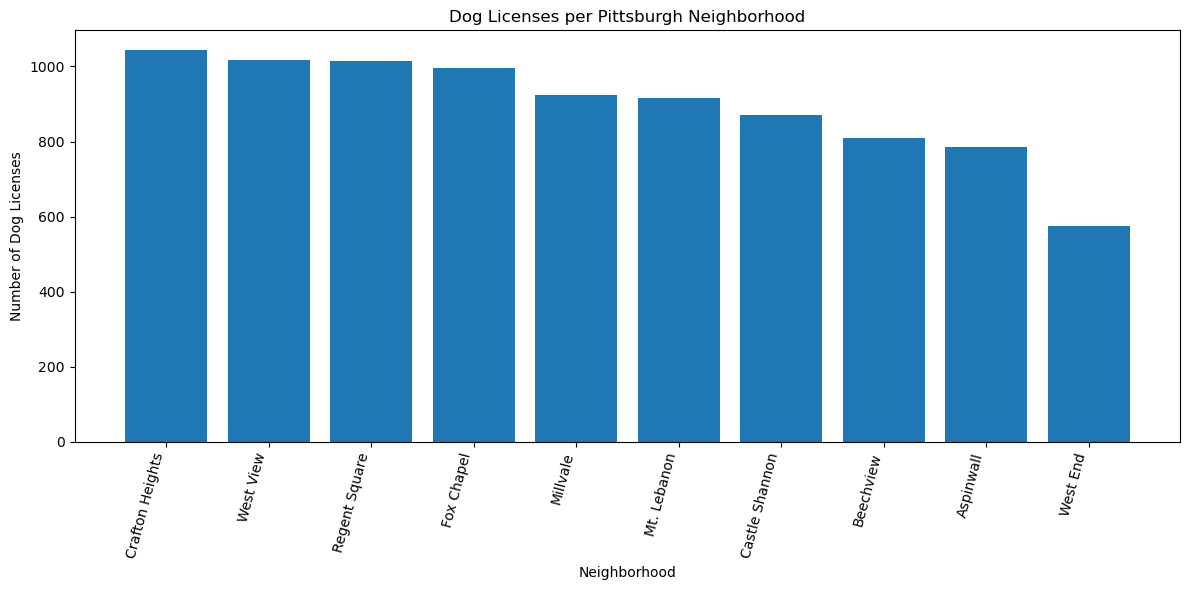

In [12]:
plot_data = NeighborhoodCounts.iloc[7:17]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(plot_data["Neighborhood"], plot_data["Dog Licenses"])
plt.xticks(rotation=75, ha="right")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Dog Licenses")
plt.title("Dog Licenses per Pittsburgh Neighborhood")
plt.tight_layout()
plt.show()

# Conclusion

The neighborhood with the most registered dog licenses in the city of Pittsburgh was Crafton Heights with a total of 1044 dog licenses. Crafton Heights applied for and were granted these dog licenses which means that the dog has an owner and is up-to-date on their necessary vaccinations. Essentially this leads to the conclusion that Crafton Heights is more of a walkable neighborhood since there are a multitude of dogs registered within its neighborhood. 
